<a href="https://colab.research.google.com/github/thedreadpersephone/data-and-python/blob/main/Copy_of_P_02a_Air_Quality_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Mini Project



---



## Define the Problem



---



###Nitrogen dioxide
Nitrogen dioxide is a poisonous gas present in the air we breathe. Although nitrogen dioxide is introduced to the environment through natural causes, human activity contributes to the level of nitrogen dioxide in the air and can increase it to a harmful extent. Nitrogen dixoide may be present indoors due to the use of gas stoves, smoking cigarettes and using butane or kerosene heaters. Outdoors, the main exposure to nitrogen dioxide comes from motor vehicles. Long term exposure to nitrogen dioxide causes inflammation of the airways, can exacerbate the symptoms of those already suffering from lung or heart conditions, and can worsen asthma in children. Nitrogen dioxide also causes harm to plants by increasing nitrogen levels in soil and water. Nitrogen dioxide is involved in the formation of ozone, another gas which is harmful to human health and to vegetation.

###The question
The question we would like to investigate is when nitrogen dioxide levels are higher. This knowledge may allow vulnerable people, such as those with lung conditions and children, to plan their journeys to avoid the peak times of exposure. It would also allow the local authority to consider the value of changes such as using or encouraging the use of electric vehicles, reducing road width and other traffic reduction measures, or to evaluate the effect of those changes if they have been introduced. Knowing more about when high levels of nitrogen dioxide are measured could provide information about which types of changes could be more effective.

## Collect the Data


---

###Data source and description
To investigate this question we will consider data collected from the Air Information Resource provided by Defra.
© Crown 2025 copyright Defra via uk-air.defra.gov.uk, licenced under the Open Government Licence (OGL).
The data has been collected by a monitoring network. We have accessed it using the data selector service here:[link text](https://uk-air.defra.gov.uk/data/data_selector_service?#mid) On this occasion we have selected data collected at Great Western Road in Glasgow, a busy urban area, and we are using data collected between 1st January 2024 and 31st December 2024.
The column headers are: Date, Time, Nitrogen Dioxide and Status. A measurement of nitrogen dioxide is provided for each hour, 24 hours a day for each day in the year.



In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/thedreadpersephone/data-and-python/refs/heads/main/AirQualityDataHourly.csv"
air_quality = pd.read_csv(url)

## Clean and Transform


---



In [2]:
def investigate_data(df):
  df.info()
  display (df.head())
  print(df["Status"].unique())
investigation = investigate_data(air_quality)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB


,Date,Time,Nitrogen dioxide,Status
0,2024-01-01,01:00:00,50.03395,V ugm-3
1,2024-01-01,02:00:00,53.74124,V ugm-3
2,2024-01-01,03:00:00,44.99584,V ugm-3
3,2024-01-01,04:00:00,24.0726,V ugm-3
4,2024-01-01,05:00:00,17.06198,V ugm-3


['V ugm-3' 'P ugm-3']


###Cleaning
From this investigation we can see that there are no null values. The status column shows whether the measurement is verified, provisionally verified, not verified or suspect. By printing the unique values from the status column we can see that all are either verified or provisionally verified. For the purposes of this project we will accept the provisionally verified values as correct and drop that column as it is no longer needed. We can also see that all the columns contain dtype objects. This is not very useful for performing calculations so we will convert the Nitrogen Dioxide column into a float column.

In the process of doing this we have discovered that 140 values in the Nitrogen Dioxide column are 'No data', so in fact there are some missing values although they are not recognised as null by Pandas. We will drop the rows with 'No data'.

In [3]:
def drop_column(df):
  #drops the Status column as no longer needed
  cols_to_drop = ['Status']
  new_df = df.drop(columns=cols_to_drop)
  display(new_df.head())
  return new_df
air_qualityV2 = drop_column(air_quality)

,Date,Time,Nitrogen dioxide
0,2024-01-01,01:00:00,50.03395
1,2024-01-01,02:00:00,53.74124
2,2024-01-01,03:00:00,44.99584
3,2024-01-01,04:00:00,24.0726
4,2024-01-01,05:00:00,17.06198


In [4]:
def drop_nodata(df):
  #drops rows with 'No data' in the nitrogen dioxide column
  index_names = df[ df['Nitrogen dioxide'] == "No data" ].index
  df.drop(index_names, inplace = True)
  df.info()
  return df
air_qualityV3 = drop_nodata(air_qualityV2)

<class 'pandas.core.frame.DataFrame'>
Index: 8644 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8644 non-null   object
 1   Time              8644 non-null   object
 2   Nitrogen dioxide  8644 non-null   object
dtypes: object(3)
memory usage: 270.1+ KB


In [5]:
def convert_column(df):
  df['Nitrogen dioxide'] = df['Nitrogen dioxide'].astype(float)
  # converts the column to float
  df.info()
  return df
air_qualityV4 = convert_column(air_qualityV3)


<class 'pandas.core.frame.DataFrame'>
Index: 8644 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8644 non-null   object 
 1   Time              8644 non-null   object 
 2   Nitrogen dioxide  8644 non-null   float64
dtypes: float64(1), object(2)
memory usage: 270.1+ KB


###Extracting
We need to extract the day of the week from the date and add this as a new column. In order to do this we must first convert the date into a datetime object and from there we extract the day of the week. We can also extract the month for future use. The conversion column is no longer needed and can be dropped. We will save this new version of the dataframe to csv.

In [6]:
def get_weekday(df, column_name):
  df['conversion'] = pd.to_datetime(df[column_name])
  df["Day"] = df['conversion'].dt.day_name()
  df["Month"] = df['conversion'].dt.month_name()
  cols_to_drop = ['conversion']
  new_df = df.drop(columns=cols_to_drop)
  display(new_df.head())
  new_df.to_csv('air_qualityV5.csv')
  return new_df
air_qualityV5 = get_weekday(air_qualityV4, "Date")

,Date,Time,Nitrogen dioxide,Day,Month
0,2024-01-01,01:00:00,50.03395,Monday,January
1,2024-01-01,02:00:00,53.74124,Monday,January
2,2024-01-01,03:00:00,44.99584,Monday,January
3,2024-01-01,04:00:00,24.07260,Monday,January
4,2024-01-01,05:00:00,17.06198,Monday,January


## Analyse


---



In [7]:
def explore_data (df):
  print(df.describe())
  print(df["Nitrogen dioxide"].mean())
explore_data(air_qualityV5)

       Nitrogen dioxide
count       8644.000000
mean          17.528466
std           14.559750
min           -0.224720
25%            7.496165
50%           12.822320
75%           23.054110
max          104.126350
17.52846593359556


###Summary statistics
Now that the data is cleaned we can begin analysis. We have 8644 remaining nitrogen dioxide values to work with. We can see that the mean nitrogen dioxide level is 17.53. The maximum level is 104.13, which is labelled as low in the daily air quality index provided by Defra.  The minimum level is -0.22, which may indicate an error as it doesn't seem to make sense to have a negative reading in this data set. We can examine the data further to see if there are any outliers.

In [10]:
def find_outliers(df):
  nitrogen_dioxide = df["Nitrogen dioxide"]
  standard_deviation = np.std(nitrogen_dioxide)
  #finds the standard deviation
  mean = np.mean(nitrogen_dioxide)
  #finds the mean
  percentile_25 = np.percentile(nitrogen_dioxide, 25)
  percentile_75 = np.percentile(nitrogen_dioxide, 75)
  IQR = percentile_75 - percentile_25
  #finds 25th and 75th percentiles in order to calculate interquartile range
  too_high = mean + (2*standard_deviation)
  #calculates the value beyond which we find outliers
  print("Upper bound: " + str(too_high))
  filter = nitrogen_dioxide > too_high
  #creates a filter which shows anything above too_high
  upper_outliers_sd = nitrogen_dioxide[filter]
  #applies the filter
  print("Upper outliers by standard deviation: " + str(upper_outliers_sd))
  too_low = mean - (2*standard_deviation)
  #creates a filter which shows anything above too_low
  print("Lower bound: " + str(too_low))
  filter = nitrogen_dioxide < too_low
  #creates a filter which shows anything above too_low
  lower_outliers_sd = df[filter]
  #applies the filter
  print("Lower outliers by standard deviation: " + str(lower_outliers_sd))
  filter = nitrogen_dioxide > percentile_75 + (1.5*IQR)
  #creates a filter which shows anything above the upper bound by IQR
  upper_outliers_iqr = nitrogen_dioxide[filter]
  #applies the filter
  print("Upper outliers by interquartile range: " + str(upper_outliers_iqr))
  filter = nitrogen_dioxide < percentile_25 - (1.5*IQR)
  #creates a filter which shows anything below the lower bound by IQR
  lower_outliers_iqr = nitrogen_dioxide[filter]
  #applies the filter
  print("Lower outliers by interquartile range: " + str(lower_outliers_iqr))


find_outliers(air_qualityV5)

Upper bound: 46.646281588459836
Upper outliers by standard deviation: 0       50.03395
1       53.74124
8       66.62428
40      49.37447
41      56.54198
          ...   
8579    58.81894
8580    55.72451
8586    57.38265
8587    49.09196
8588    66.33602
Name: Nitrogen dioxide, Length: 517, dtype: float64
Lower bound: -11.589349721268718
Lower outliers by standard deviation: Empty DataFrame
Columns: [Date, Time, Nitrogen dioxide, Day, Month]
Index: []
Upper outliers by interquartile range: 0       50.03395
1       53.74124
8       66.62428
40      49.37447
41      56.54198
          ...   
8580    55.72451
8586    57.38265
8587    49.09196
8588    66.33602
8752    46.39343
Name: Nitrogen dioxide, Length: 524, dtype: float64
Lower outliers by interquartile range: Series([], Name: Nitrogen dioxide, dtype: float64)


###Outliers
We can see that there are a large number of outliers in the upper range by both standard deviation and by interquartile range. However there are no outliers in the lower range.

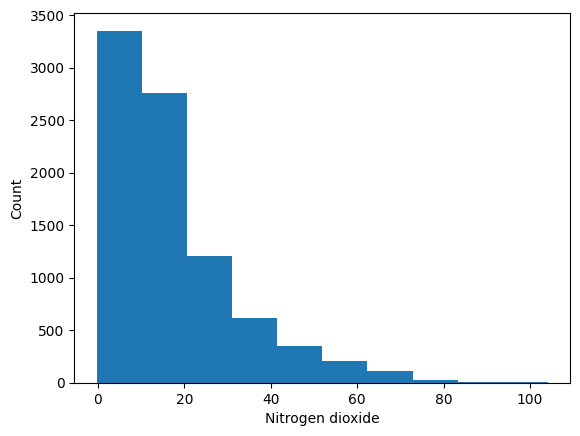

In [ ]:
def create_histogram(df):
  col_to_keep = ["Nitrogen dioxide"]
  levels = df[col_to_keep]
  plt.hist(levels)
  plt.xlabel('Nitrogen dioxide')
  plt.ylabel("Count")
  plt.show()
create_histogram(air_qualityV5)

###Frequency
This histogram shows the frequency of nitrogen dioxide measurements. We can see that lower measurements are much more frequent than higher measurements.

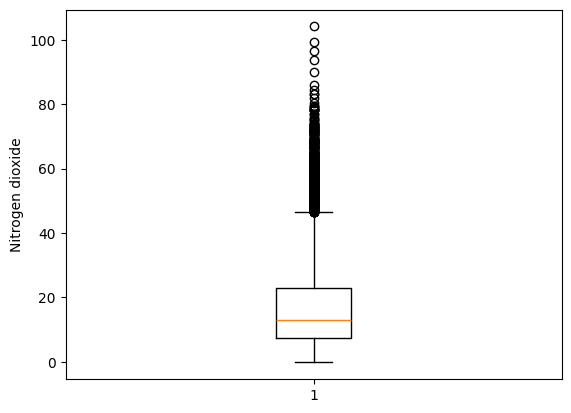

In [ ]:
def create_boxplot(df):
  col_to_keep = ["Nitrogen dioxide"]
  levels = df[col_to_keep]
  plt.boxplot(levels)
  plt.ylabel('Nitrogen dioxide')
  plt.show()
create_boxplot(air_qualityV5)

###Skew
Similarly to the histogram, this boxplot shows that the data are skewed towards the lower levels of nitrogen dioxide. However we can also see quite a number of outliers beyond the upper whisker.

###Frequency
This histogram shows the frequency of nitrogen dioxide measurements. We can see that lower measurements are much more frequent than higher measurements.

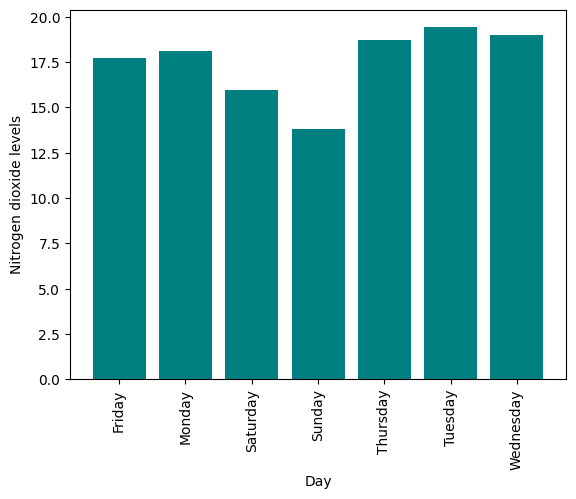

In [ ]:
def create_day_graph(df):
  days = df.groupby('Day')['Nitrogen dioxide'].mean()
  labels = days.keys()
  plt.bar(labels, days, color="teal")
  plt.xlabel("Day")
  plt.ylabel("Nitrogen dioxide levels")
  plt.xticks(rotation=90)
  plt.show()
create_day_graph(air_qualityV5)

###Nitrogen levels by day
This bar graph shows mean nitrogen dioxide levels for each day of the week. We can see that Tuesday has the highest mean nitrogen dioxide level, with Wednesday and Thursday being close behind, while Sunday has the lowest. This suggests higher levels of traffic around midweek and lower at the weekend.

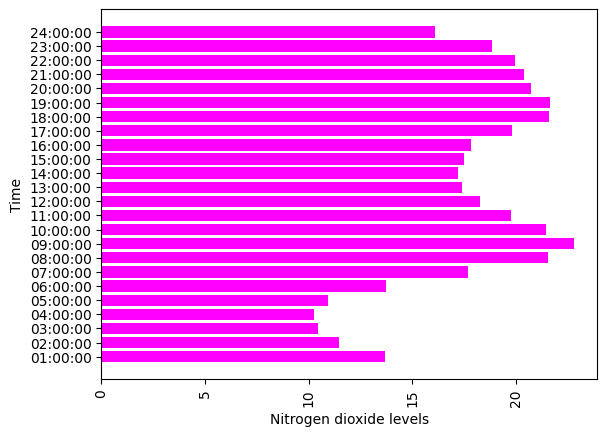

In [ ]:
def create_time_graph(df):
  time = df.groupby('Time')['Nitrogen dioxide'].mean()
  labels = time.keys()
  plt.barh(labels, time, color="fuchsia")
  plt.xlabel("Nitrogen dioxide levels")
  plt.ylabel("Time")
  plt.xticks(rotation=90)
  plt.show()
create_time_graph(air_qualityV5)

###Nitrogen levels by time
This bar graph shows the mean nitrogen dioxide levels for each hour across 24 hours. As we might expect, levels are lowest between 1am and 6am when traffic is likely to be light. They become higher from 7am to 11am when people are likely to be travelling to workplaces, to school and university, with the highest mean value at 9am. They peak at around 6pm to 7pm, remaining on the higher side until 11pm. This suggests that traffic is not only heavier during traditional rush hour times, but also later in the evening, reflecting the area's active nightlife.

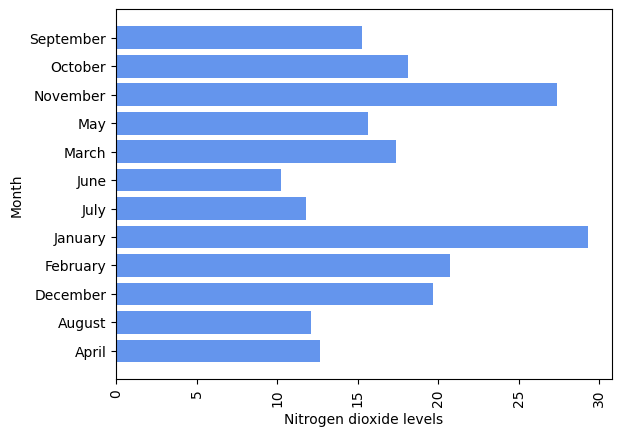

In [ ]:
def create_month_graph(df):
  months = df.groupby('Month')['Nitrogen dioxide'].mean()
  labels = months.keys()
  plt.barh(labels, months, color="cornflowerblue")
  plt.xlabel("Nitrogen dioxide levels")
  plt.ylabel("Month")
  plt.xticks(rotation=90)
  plt.show()
create_month_graph(air_qualityV5)

###Nitrogen dioxide levels by month
This bar graph shows the mean nitrogen dioxide levels for each month. January has the highest mean level, with November close behind. The summer months have lower levels. These patterns may represent a combination of higher vehicle use during winter and the area being quieter at certain times of year due to a reduction numbers of university students and staff.

## Interpret and Visualise


---



<img src="https://drive.google.com/uc?id=1JY8OMgEegSFuZjbtMneW64tdKpE54YZk">


<img src="https://drive.google.com/uc?id=1rZWGqlrk2MTIiQVbaOovw2E6rDy_oqZ2">

<img src="https://drive.google.com/uc?id=1l2WNDbAw_W6ijN4RcVAWhJ9DLP33n3Yh">


<img src="https://drive.google.com/uc?id=1v1voCbwL72lTgyKvlZlPzvRnCQWqFugG">


## Tell the Story



---



###Key findings
We have seen that there are certain times of day, certain days of the week and certain months in which higher average nitrogen dioxide levels have been measured. These match our expectations in terms of when the road is likely to be busier - during morning and afternoon peak travel times, during winter when weather is likely to dissuade people from using active travel methods and on weekdays. This location also sees higher levels in the late evening, most likely due to the presence of pubs and restaurants nearby.

For the individual, it is difficult to take any action based on this data. For example, children have to travel to school between 8 and 9am on winter weekdays even though levels are higher at that time. People with health conditions may be able to plan some journeys to avoid the times with the highest nitrogen dioxide levels, however it is not reasonable to expect them to travel in the early hours of the morning when levels are at their lowest. We should also note that the maximum level of nitrogen dioxide measured on a given day or time is noticeably higher than the average level, so traveling at a particular time doesn't guarantee experiencing a particular level of nitrogen dioxide. However, we may provide some reassurance that even the highest level measured is still considered low according to the Daily Air Quality Index.

For local authorities, this may be an opportunity to look at how to decrease the levels of nitrogen dioxide at peak times. For example, is there a way of encouraging people to use active travel more during the winter? Perhaps by providing discounted fares on public transport or an awareness campaign. Public transport may also be contributing to the nitrogen dioxide depending on whether it is using electricity or fossil fuels, so this could be another area for local authorities to consider.

There are a number of outliers in this data at the higher end of the levels measured. We can speculate that traffic was particularly heavy due to a local event or perhaps a traffic jam was caused by roadworks. It is possible that other data about traffic flow could provide more insight.

###Next steps
This project has taken a set of data showing measurements collected in one location. However the functions have been written in such a way that it should be possible to take other data sets from the same source and explore them in a similar way. It would be interesting to compare this urban setting with a rural setting for example, or a different street in Glasgow. Great Western Road is currently an area of expanding cycle lanes, so looking at data that is collected in the future could be a way of assessing the impact of this infrastructure.

## Evaluate the Process


---



###Collecting the data
This initial phase went well and it was nice to see accessible data on this topic.
###Cleaning and extracting
I had a lot of trouble with this. I didn't notice the 'no data' values in the nitrogen dioxide column until I tried to convert the values to float. I thought it would be easier to do this in Excel, which it was, but then when I tried to extract the weekday from this new version of the file it no longer worked. I then reverted back to dealing with the 'no data' values in Python instead. I tried to change them to NaN prior to dropping the rows but I couldn't get this to work so instead found a way of dropping them as they were. Having done this, the weekday extraction worked again.
###Analysis
Making bivariate charts was no problem but I struggled to think of univariate charts that would be meaningful to this project.
###Interpret and visualise
After feedback from my last project I was able to use a meaningful gradient in the colour of bars in a chart. I couldn't always figure out how to show items the way I wanted, for instance I would prefer the slicer to show days of the week in order. I was pleased that I was able to calculate outliers in Python and highlight them in Power BI as this was something I couldn't figure out in the previous group project.
###Tell the story
Summarising the results, writing about what they might mean and potential next steps is a part of the process I feel comfortable with. I am always thinking about how to report the results throughout the process so I am prepared with some ideas when I get to this section.
